# Life cycle of a data science project:
    1 Data analysis
    2 Feature engineering
    3 Feature selection
    4 Model building
    5 Model deployment

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv(r'E:\new Downloads\house price train.csv')
df.shape

(1460, 81)

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
for i in df.columns:
    if df[i].isnull().sum()>1:
        print(i, '=',np.round(df[i].isnull().mean(),4))

LotFrontage = 0.1774
Alley = 0.9377
MasVnrType = 0.0055
MasVnrArea = 0.0055
BsmtQual = 0.0253
BsmtCond = 0.0253
BsmtExposure = 0.026
BsmtFinType1 = 0.0253
BsmtFinType2 = 0.026
FireplaceQu = 0.4726
GarageType = 0.0555
GarageYrBlt = 0.0555
GarageFinish = 0.0555
GarageQual = 0.0555
GarageCond = 0.0555
PoolQC = 0.9952
Fence = 0.8075
MiscFeature = 0.963


In [15]:
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
feature_year=[feature for feature in df.columns if 'Year' in feature or 'Yr' in feature]
feature_int=[feature for feature in df.columns if df[feature].dtype!='O']
feature_discrete=[feature for feature in feature_int if len(df[feature].unique())<25 and feature not in feature_year]
feature_continous=[feature for feature in feature_int if feature not in feature_discrete+feature_year+['Id']]
feature_categorical=[feature for feature in df.columns if df[feature].dtype=='O']

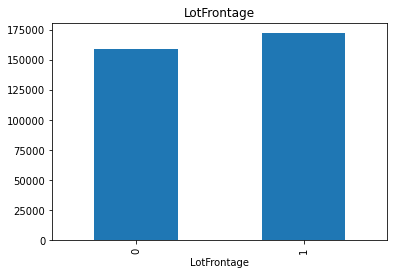

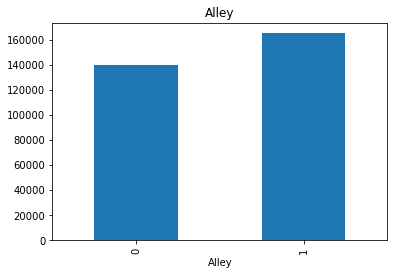

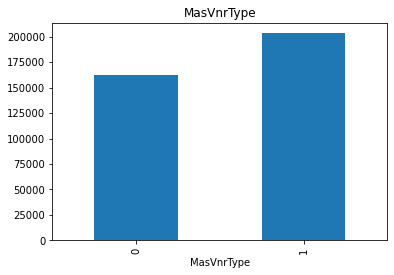

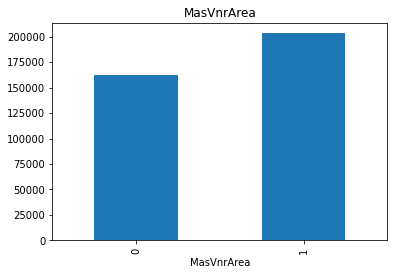

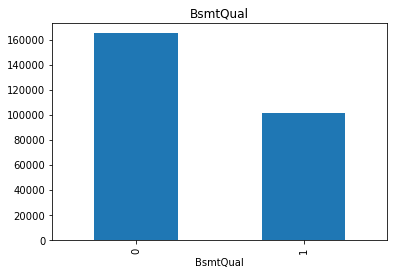

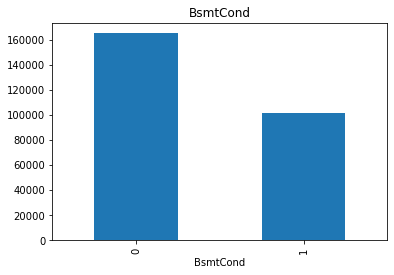

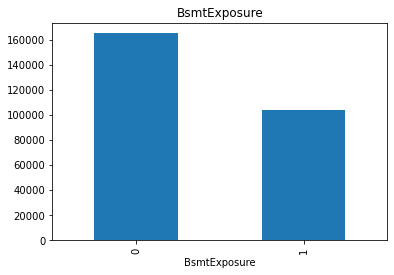

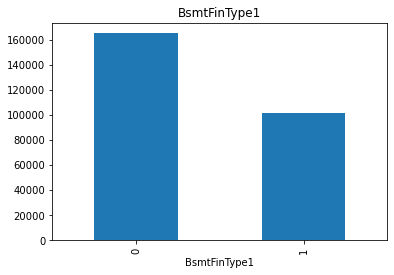

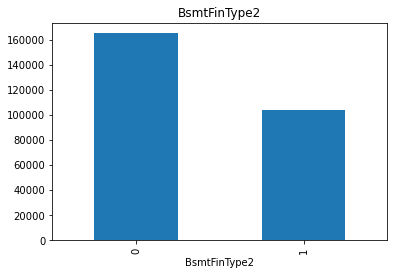

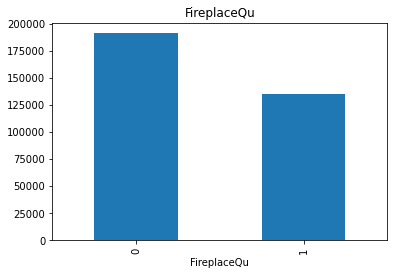

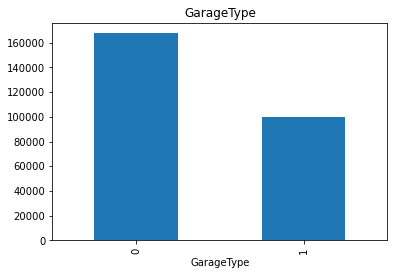

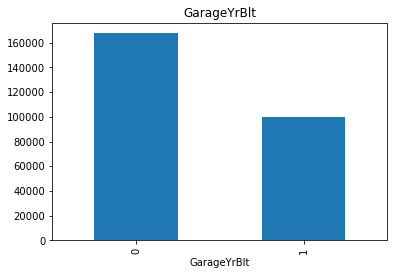

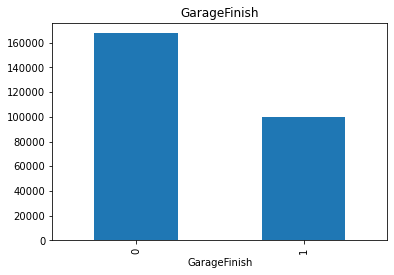

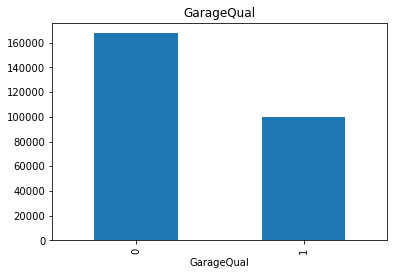

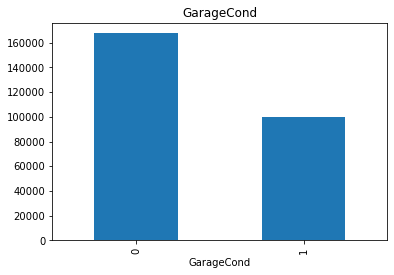

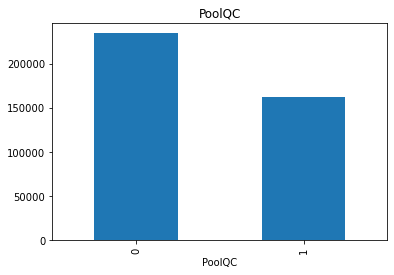

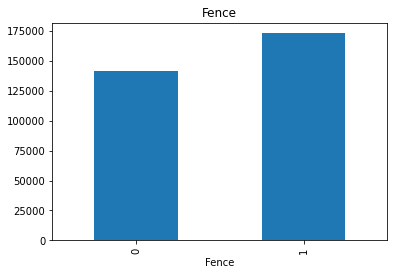

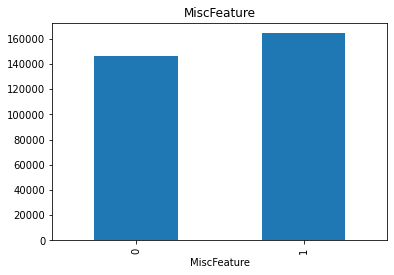

In [6]:
for i in feature_with_na:
    data=df.copy()
    data[i]=np.where(data[i].isnull(),1,0)
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.show()

as null values hold high value thus we cant drop the null values

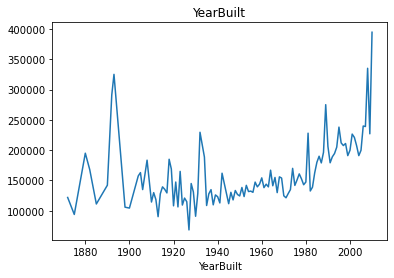

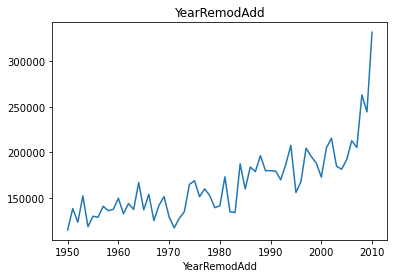

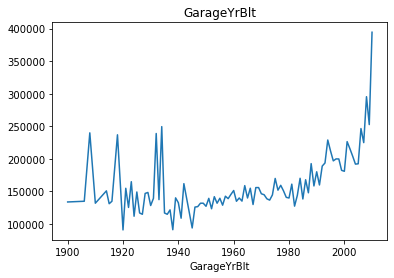

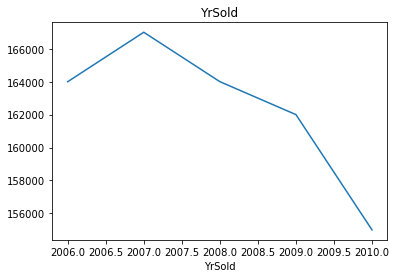

In [7]:
for i in feature_year:
    data.groupby(i)['SalePrice'].median().plot()
    plt.title(i)
    plt.show()

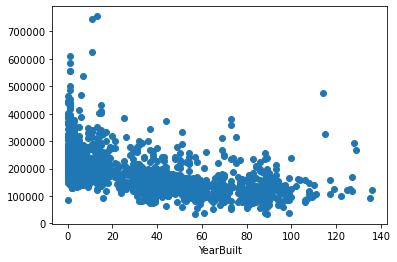

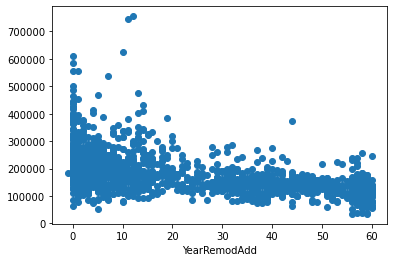

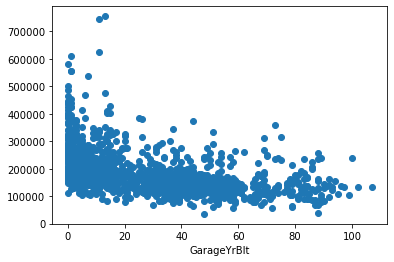

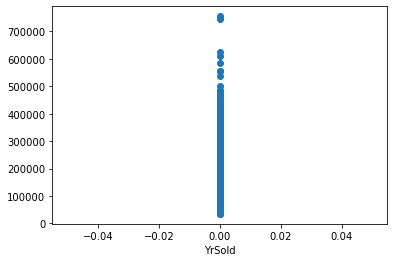

In [8]:
for i in feature_year:
    data[i]=data['YrSold']-data[i]
    plt.scatter(data[i],data['SalePrice'])
    plt.xlabel(i)
    plt.show()

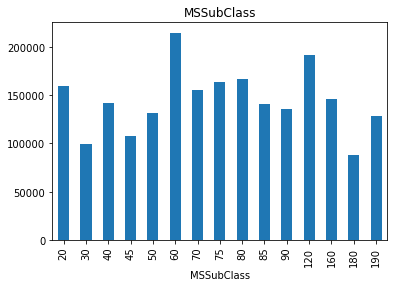

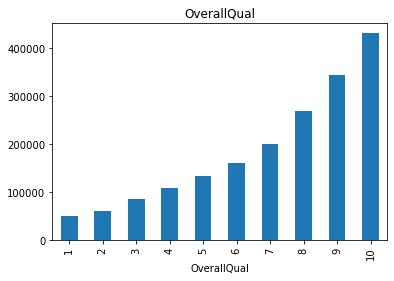

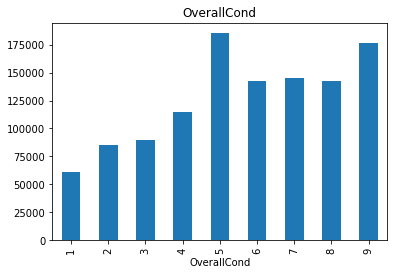

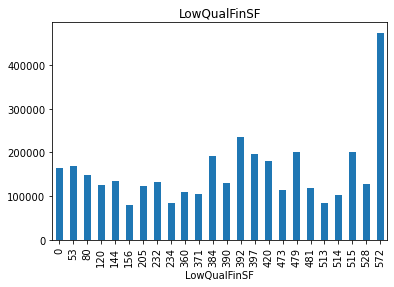

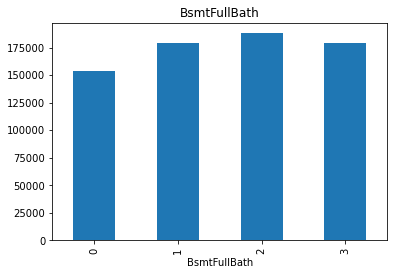

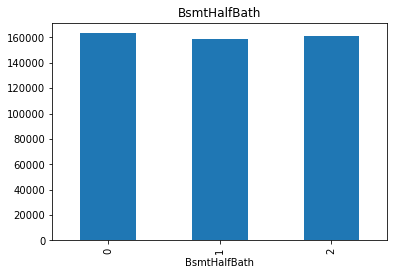

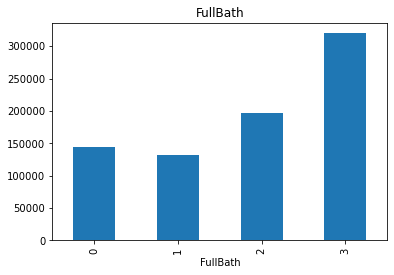

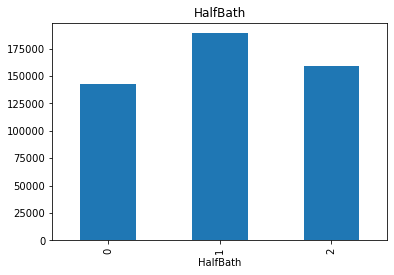

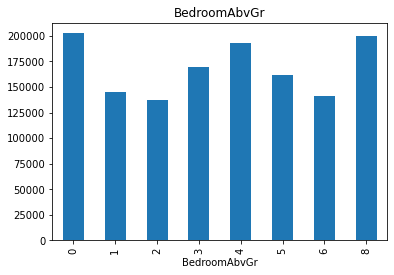

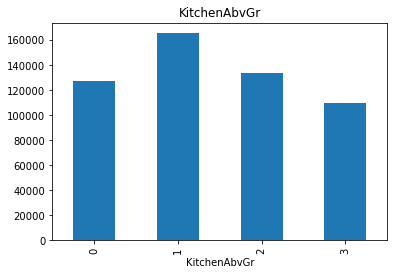

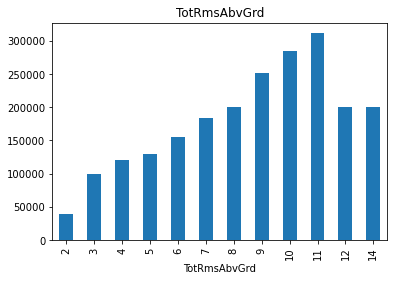

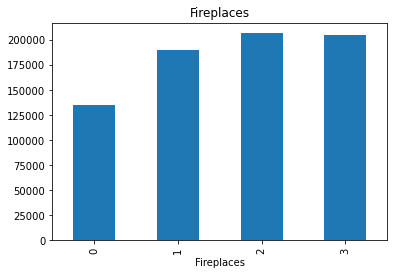

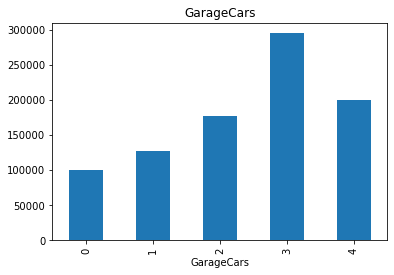

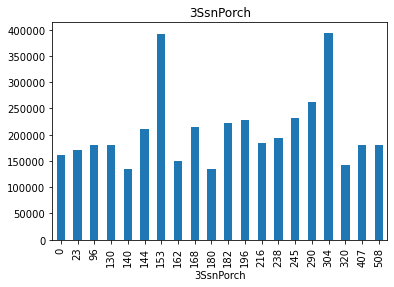

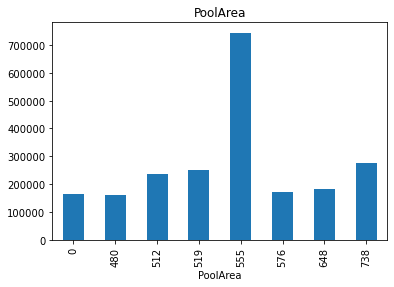

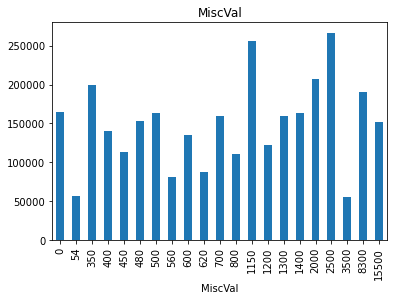

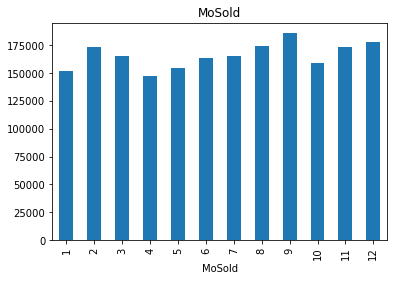

In [9]:
for i in feature_discrete:
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.show()
    

C:\Users\Sakshi\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sakshi\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


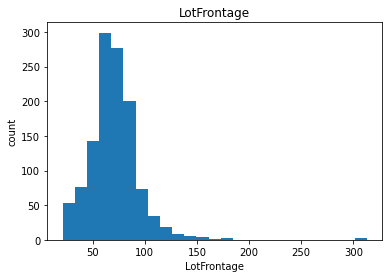

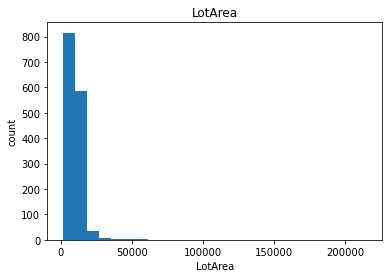

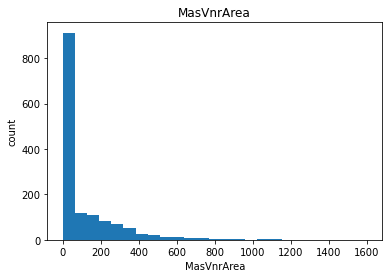

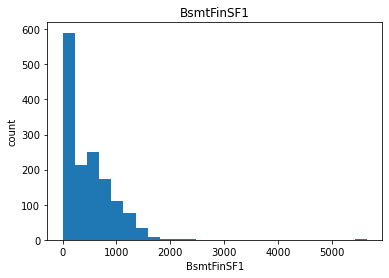

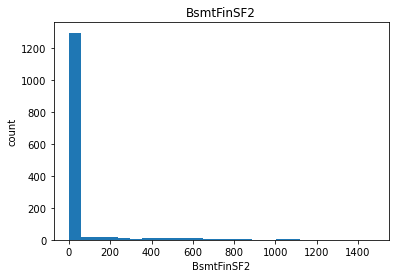

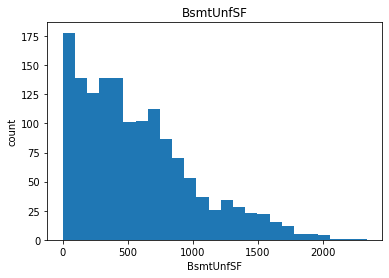

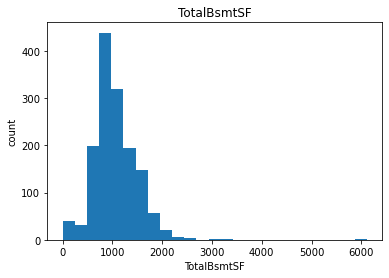

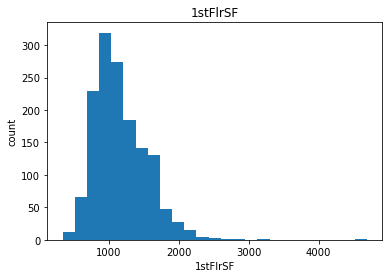

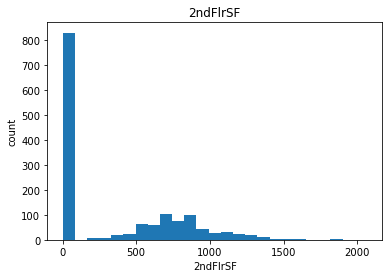

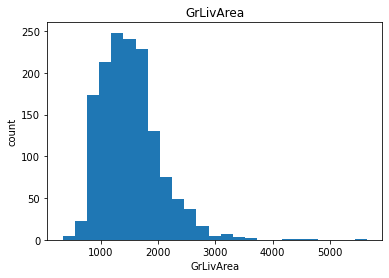

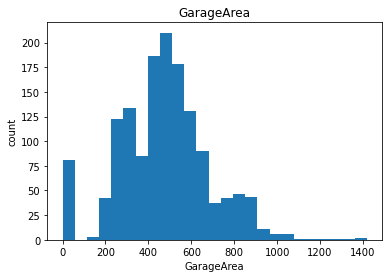

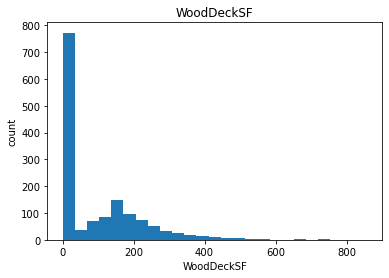

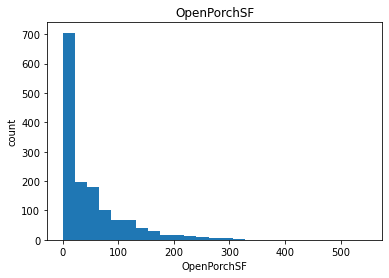

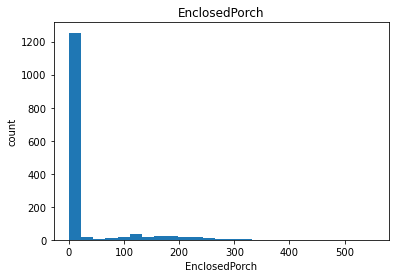

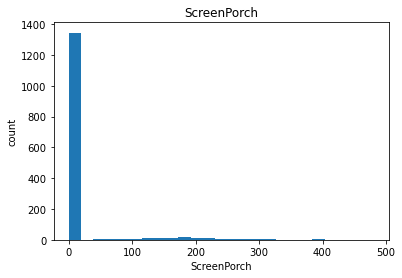

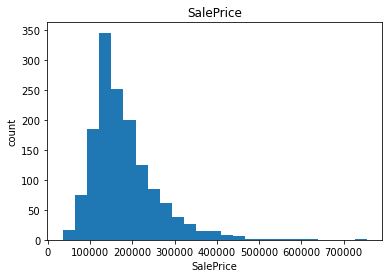

In [10]:
for i in feature_continous:
    plt.hist(df[i],bins=25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(i)
    plt.show()

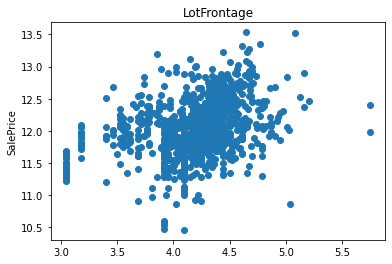

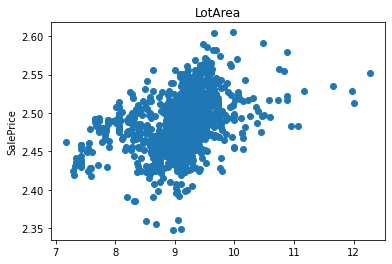

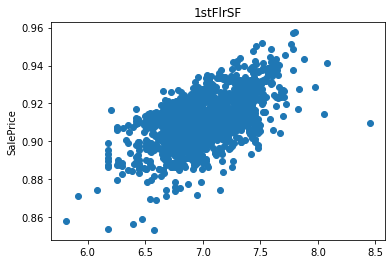

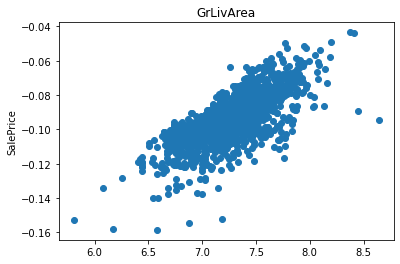

C:\Users\Sakshi\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


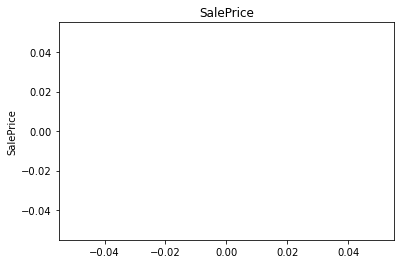

In [11]:
#we will be using logarithmic transformation

for i in feature_continous:
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[i],data['SalePrice'])
        plt.ylabel('SalePrice')
        plt.title(i)
        plt.show()
    

# outliers

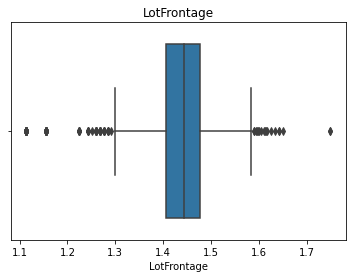

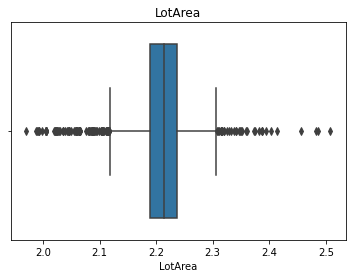

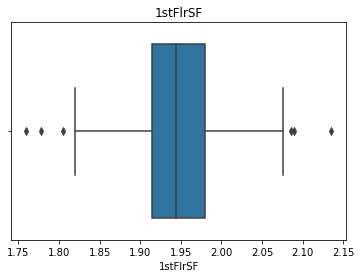

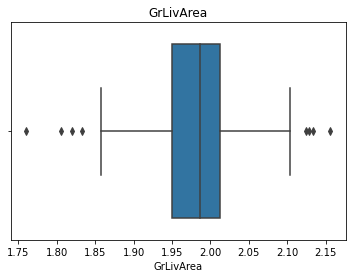

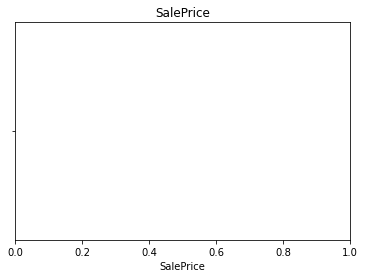

In [12]:
for i in feature_continous:
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        sb.boxplot(data[i])
        plt.title(i)
        plt.show()

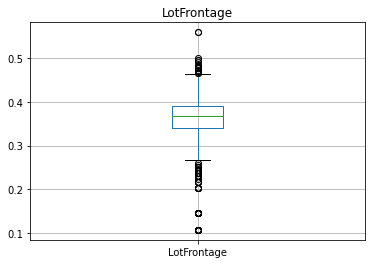

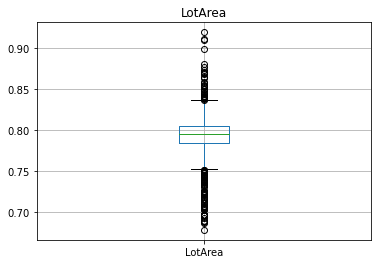

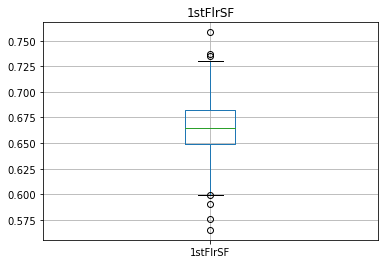

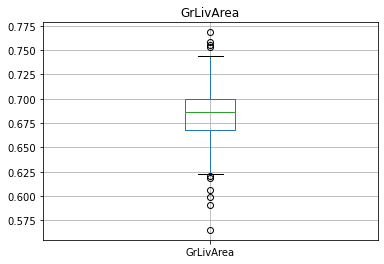

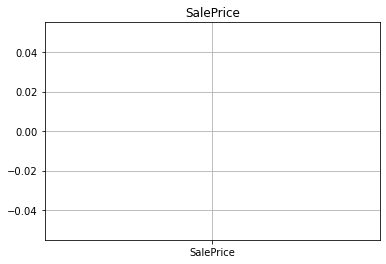

In [13]:
for i in feature_continous:
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data.boxplot(i)
        plt.title(i)
        plt.show()

# categorical variables


In [16]:
feature_categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
df[feature_categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
for i in feature_categorical:
    print(i, '=', df[i].unique(),'and no. is',len(df[i].unique()))

MSZoning = ['RL' 'RM' 'C (all)' 'FV' 'RH'] and no. is 5
Street = ['Pave' 'Grvl'] and no. is 2
Alley = [nan 'Grvl' 'Pave'] and no. is 3
LotShape = ['Reg' 'IR1' 'IR2' 'IR3'] and no. is 4
LandContour = ['Lvl' 'Bnk' 'Low' 'HLS'] and no. is 4
Utilities = ['AllPub' 'NoSeWa'] and no. is 2
LotConfig = ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] and no. is 5
LandSlope = ['Gtl' 'Mod' 'Sev'] and no. is 3
Neighborhood = ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] and no. is 25
Condition1 = ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] and no. is 9
Condition2 = ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] and no. is 8
BldgType = ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] and no. is 5
HouseStyle = ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fi

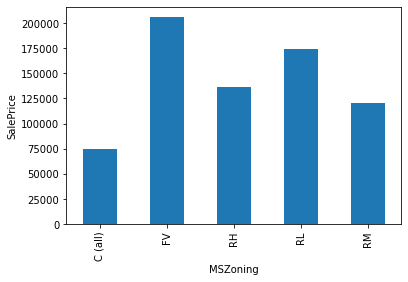

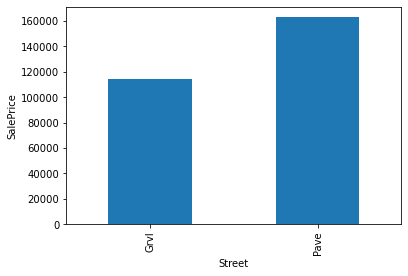

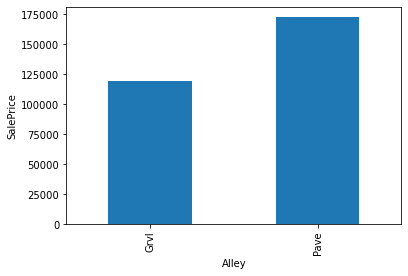

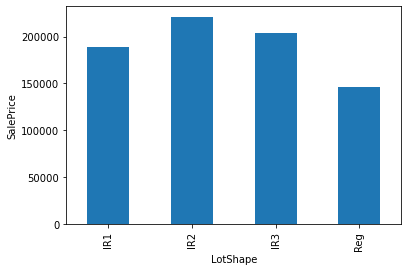

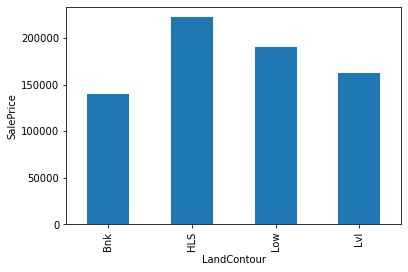

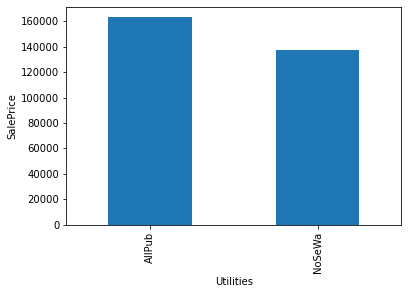

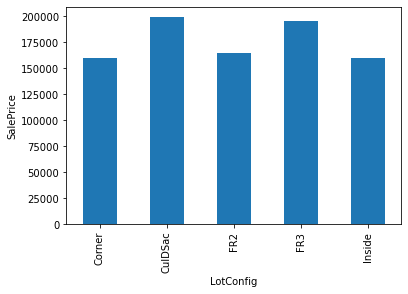

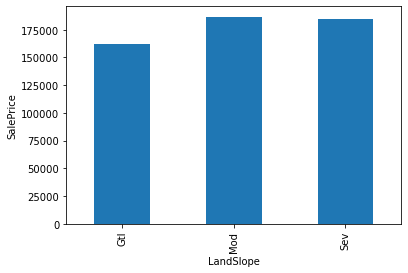

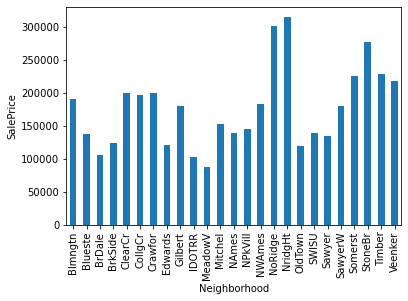

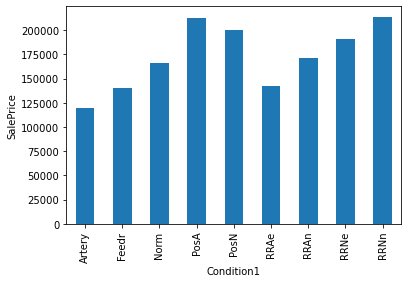

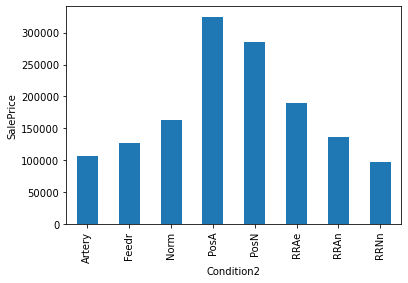

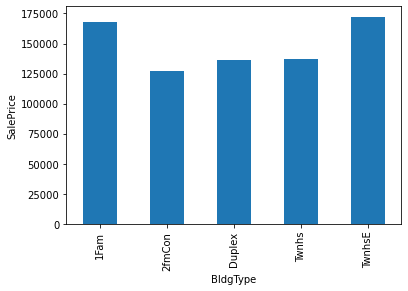

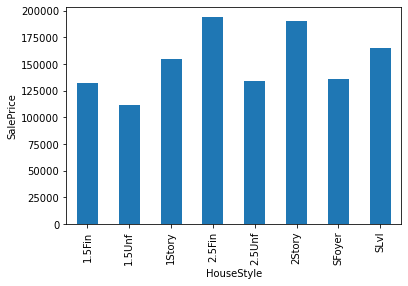

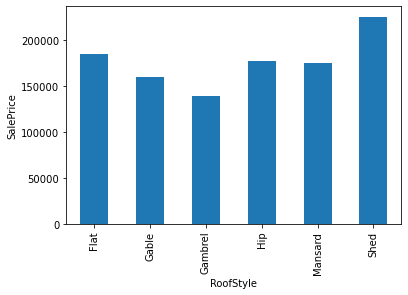

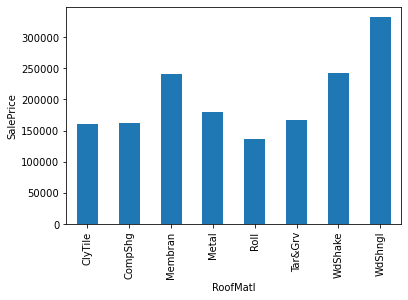

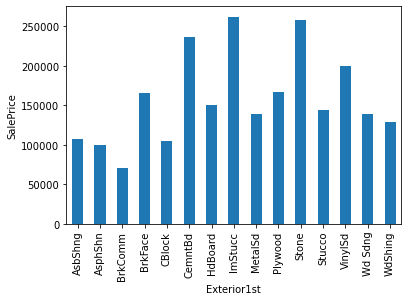

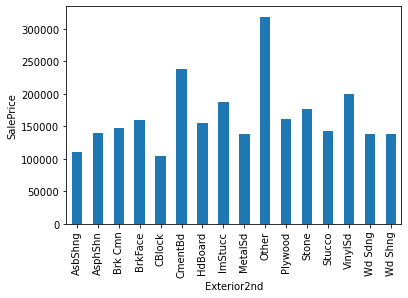

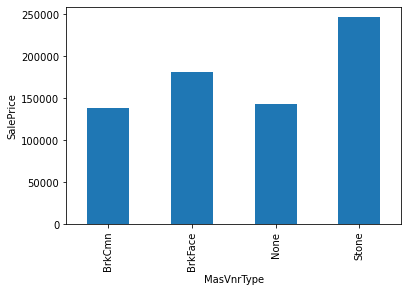

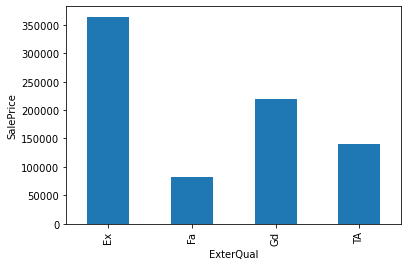

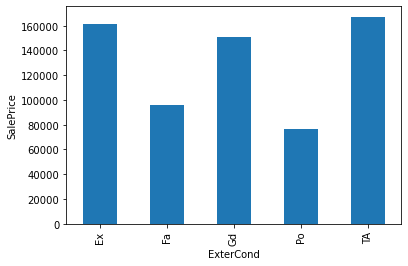

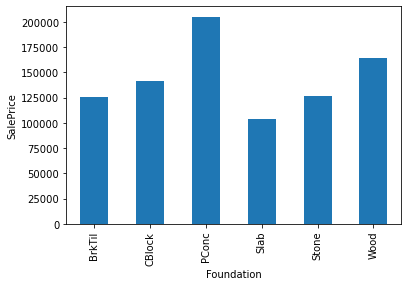

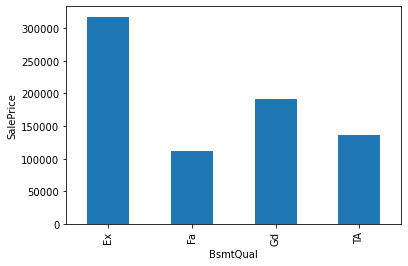

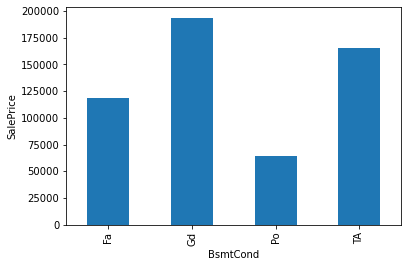

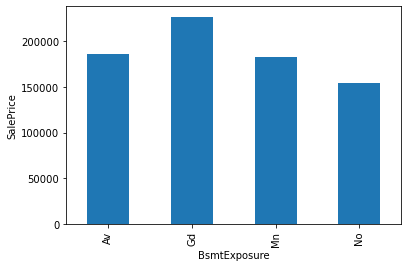

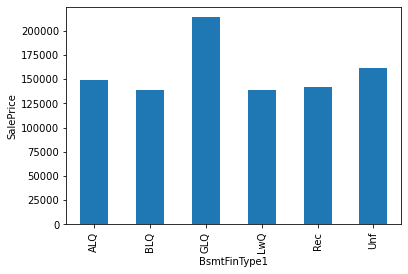

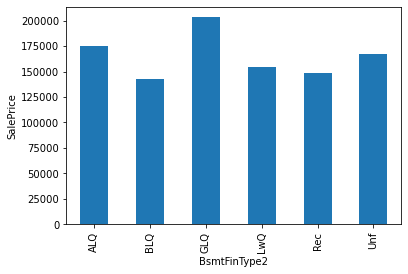

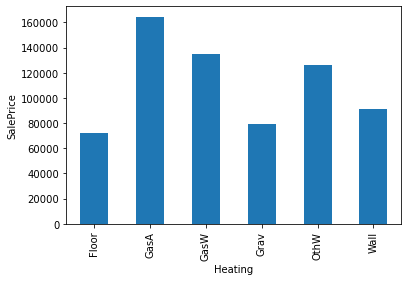

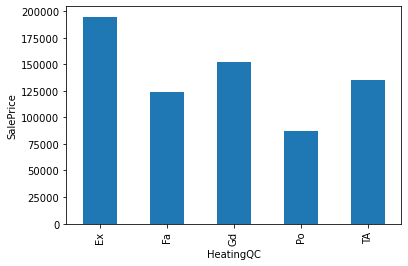

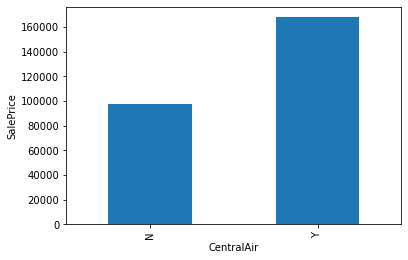

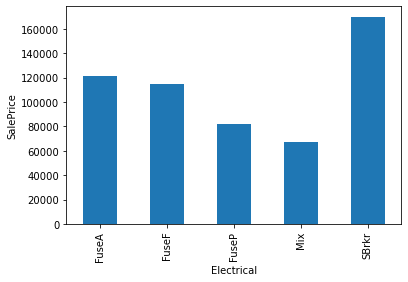

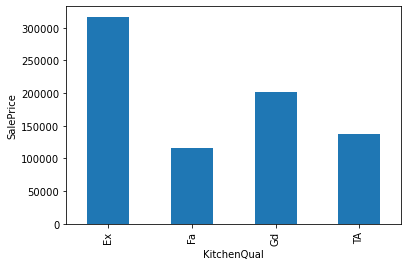

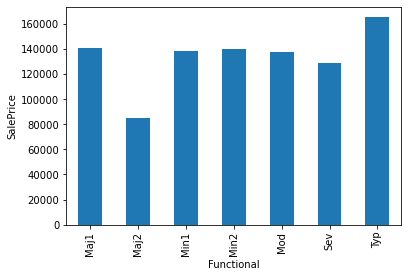

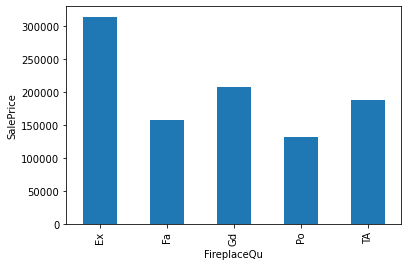

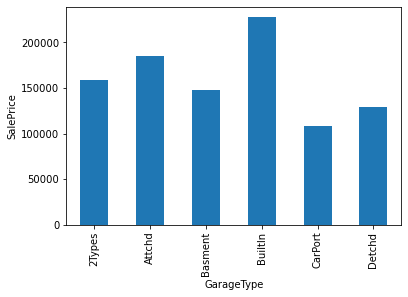

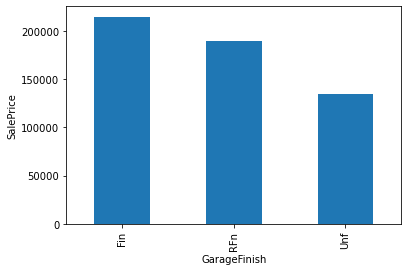

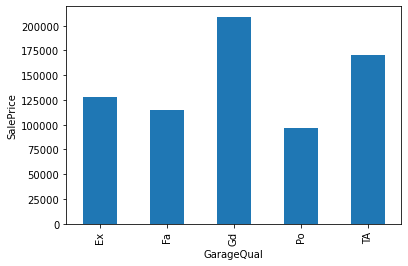

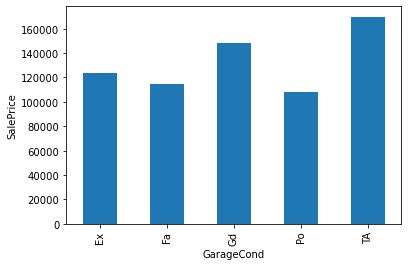

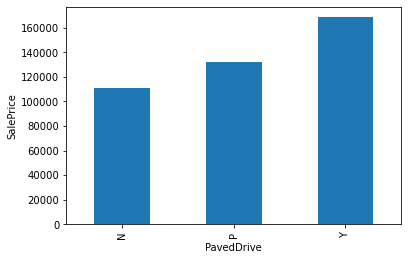

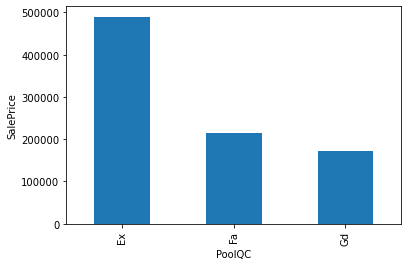

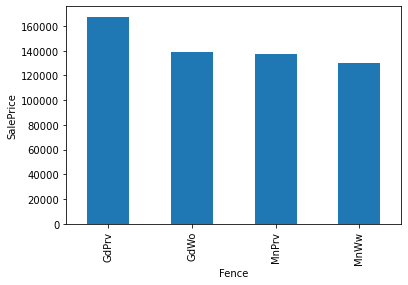

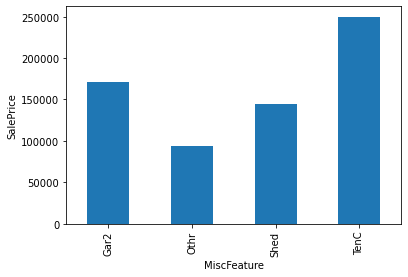

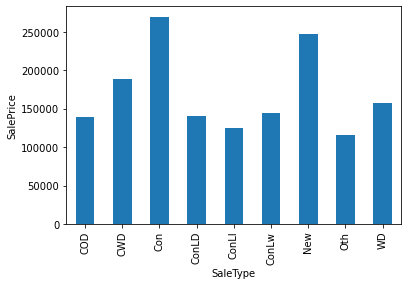

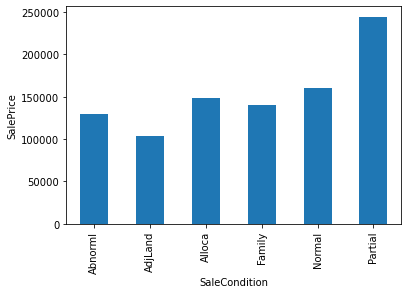

In [23]:
for i in feature_categorical:
    data=df.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()